# Experimental Methodology in Natural Language Processing


## Objectives

- Understanding 
    - the role and types of evaluation in NLP/ML
    - the lower and upper bounds of performance
    - correct usage of data for experimentation
    - evaluation metrics
    
- Learning how to use `scikit-learn` to perform a text classification experiment
    - provided baselines
    - text vectorization
    - evaluation methods

### Requirements
- [scikit-learn](https://scikit-learn.org/)
    - run `pip install scikit-learn`

## 1. Basic Concepts of Experimental Method

### 1.1. Lower & Upper Bounds of the Performance

#### Lower Bound: Baseline
Trivial solution to the problem: 

- _random_: random decision
- _chance_: random decision w.r.t. the distribution of categories in the training data
- _majority_: assign everything to the largest category etc.
- or the *state-of-the-art* model that you want to beat

#### Upper Bound: Inter-rater agreement
Usually human performance.

A system is expected to perform within the lower and upper bounds.
            

### 1.2. Data Split

#### 1.2.1. Training-Testing Split

Often Data Set is split into the following parts:

- _Training_: for training / extracting rules / etc.
- _Development_ (Validation, or simply Dev): for optimization / intermediate evaluation
- _Testing_: for the final evaluation 

#### 1.2.1. [K-Fold Cross-Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))
In k-fold cross-validation, the original sample is randomly partitioned into $k$ equal sized subsamples. Of the $k$ subsamples, a single subsample is retained as the validation data for testing the model, and the remaining $k − 1$ subsamples are used as training data. The cross-validation process is then repeated $k$ times, with each of the $k$ subsamples used exactly once as the validation data. The $k$ results can then be averaged to produce a single estimation.

\*
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png " alt="kfold" width="500"/>

\*Image from https://scikit-learn.org/stable/modules/cross_validation.html

- Random K-Fold Cross-Validation splits data into $K$ equal folds
- Stratified K-Fold Cross-Validation additionally makes sure that the distribution of target labels is similar across different folds

The general procedure is as follows:

- Shuffle the dataset randomly
- Split the dataset into $k$ folds
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
- Summarize the model performance averaging the evaluation scores

## 2. Evaluation Metrics

### 2.1. Contingency Table

A [contingency table](https://en.wikipedia.org/wiki/Contingency_table) (also known as a _cross tabulation_ or _crosstab_) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. For the binary classification into positive (_POS_) and negative (_NEG_) classes, the predictions of a model (_HYP_, for hypotheses) with respect to the true labels (_REF_, for referencens) can be represented as the  matrix.

|     |         | REF     |         |
|-----|---------|:-------:|:-------:|
|     |         | __POS__ | __NEG__ |
| HYP | __POS__ | TP      | FP      |
|     | __NEG__ | FN      | TN      |


Where:
- __TP__: True Positives (usually denoted as $a$)
- __FP__: False Positivea ($b$)
- __FN__: False Negatives ($c$)
- __TN__: True Negativea ($d$)

### 2.1. The Simplest Case: Accuracy

$$ \text{Accuracy} = \frac{\text{Num. of Correct Decisions}}{\text{Total Num. of Instances}} $$

- Known number of instances
- Single decision for each instance 
- Single correct answer for each instance 
- All errors are equal

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$$

__What if TN is infinite or unknown?__

e.g.: Number of irrelevant queries to a search engine

### 2.2. Precision & Recall

|     |         | REF     |         |             |
|-----|---------|:-------:|:-------:|-------------|
|     |         | __POS__ | __NEG__ |             |
| HYP | __POS__ | TP      | FP      | _Precision_ |
|     | __NEG__ | FN      | TN      |             |
|     |         | _Recall_ |        |             |


$$ \text{Precison} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

$$ \text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}$$

<img src="https://miro.medium.com/max/878/1*Ub0nZTXYT8MxLzrz0P7jPA.png" width="800"/>


__2 Values__: 

Precision-Recall Trade-Off

### 2.3. F-Measure

- Harmonic Mean of Precision & Recall 
- Usually evenly weighted


$$F_{\beta} = \frac{(1 + \beta^2) ∗ \text{Precision} ∗ \text{Recall}}{\beta^2 ∗ \text{Precision} + \text{Recall}}$$

Most common value of $\beta = 1$

$ F_1 = \frac{2 ∗ \text{Precision} ∗ \text{Recall}}{\text{Precision} + \text{Recall}}$

### 2.4. Micro, Macro and (Macro-) Weighted Averaging

In a Multi-Class setting per-class scores are averaged to produce a single score.
There are several ways the scores could be averaged. 

__Micro Averaging__

We compute scores summing over True Positive, True Negative, False Positive and False Negatives.

__Macro Averaging__

We first compute scores per class, then average the scores ignoring their distribution in the test set.

__(Macro-) Weighted Averaging__

Similar to Macro Averaging, but we additionally weight the scores by the class-frequency.

#### Precision Example

Let's assume we have 3 classes. The precision formula from above is:

$$ \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

$$\text{Micro Precision} = \frac{\text{TP}_1 + \text{TP}_2 +\text{TP}_3}{(\text{TP}_1 + \text{TP}_2 +\text{TP}_3)+(\text{FP}_1 + \text{FP}_2 +\text{FP}_3)}$$

$$\text{Macro Precision} = \frac{P_1 + P_2 + P_3}{3} = P_1 * \frac{1}{3} + P_2 * \frac{1}{3} + P_3 * \frac{1}{3}$$

$$\text{Weighted Precision} = P_1 * \frac{S_1}{N} + P_2 * \frac{S_2}{N} + P_3 * \frac{S_3}{N}$$

Where:
- $S$ is the support for the class (i.e. number of observations with that labels)
- $N$ is the total number of observations

## 3. Classification with Scikit-Learn

- Loading Data
- Baselines
- Training Classifier
- Evaluation


### 3.1. Loading and Inspecting a Dataset

`scikit-learn` comes with several toy datasets.
Let's use one of those (iris) to perform a simple classification experiment.

Iris dataset: https://archive.ics.uci.edu/ml/datasets/iris 
 - 3 lineraly and not-linearly separable classes
    
The iris dataset is a classic and very easy multi-class classification dataset.

| Property          | Value |
|-------------------|-------|
| Classes           |   3 |
| Samples per class |  50 |
| Samples total     | 150 |
| Dimensionality    |   4 | 
| Features          | real, positive | 

In [3]:
from sklearn.datasets import load_iris
from collections import Counter
data = load_iris()

In [4]:
data.tar

AttributeError: tar

In [132]:
print("Classes: {}".format(len(list(data.target_names))))
print("Samples: {}".format(len(data.data)))
print("Dimensionality: {}".format(len(list(data.feature_names))))
print("Samples per Class: {}".format(dict(Counter(list(data.target)))))

Classes: 3
Samples: 150
Dimensionality: 4
Samples per Class: {0: 50, 1: 50, 2: 50}


In [133]:
# prints feature vector for first data point
print("Features Vectors: {}".format(data.data[0]))

# prints matrix shape for data
print("Data Matrix Shape: {}".format(data.data.shape))

Features Vectors: [5.1 3.5 1.4 0.2]
Data Matrix Shape: (150, 4)


In [134]:
# prints full data set description
print("Description: \n{}".format(data.DESCR))

print()

# prints features names
print("Features names: {}".format(data.feature_names))

Description: 
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===

### 3.2. Splitting the Dataset

- Random K-Fold Split
- Stratified K-Fold Split

In [135]:
from sklearn.model_selection import KFold
n_split = 5
random_split = KFold(n_splits=n_split, shuffle=True)

# Random and Stratified splits return the indexes of the data points (X or Y)
# and not the data point itself
for train_index, test_index in random_split.split(data.data):
    print("Samples per Class in Training: {}".format(dict(Counter(list(data.target[train_index])))))
    print("Samples per Class in Testing: {}".format(dict(Counter(list(data.target[test_index])))))

Samples per Class in Training: {0: 39, 1: 41, 2: 40}
Samples per Class in Testing: {0: 11, 1: 9, 2: 10}
Samples per Class in Training: {0: 42, 1: 39, 2: 39}
Samples per Class in Testing: {0: 8, 1: 11, 2: 11}
Samples per Class in Training: {0: 38, 1: 40, 2: 42}
Samples per Class in Testing: {0: 12, 1: 10, 2: 8}
Samples per Class in Training: {0: 44, 1: 39, 2: 37}
Samples per Class in Testing: {0: 6, 1: 11, 2: 13}
Samples per Class in Training: {0: 37, 1: 41, 2: 42}
Samples per Class in Testing: {0: 13, 1: 9, 2: 8}


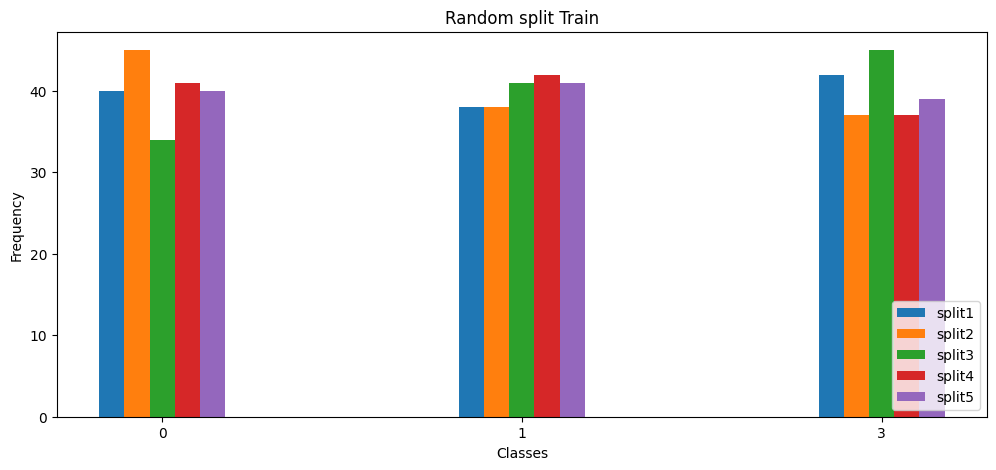

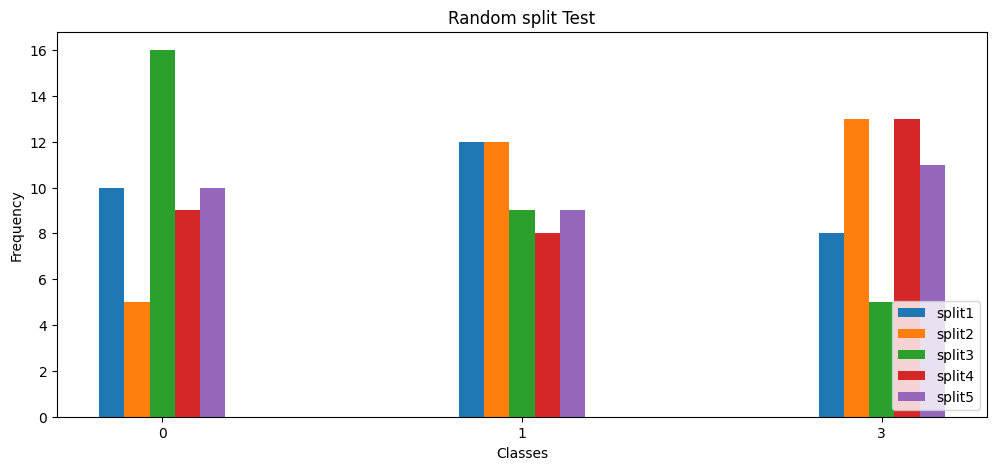

In [136]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars(values, labels, width=0.35, title=""):
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(12,5))
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Classes')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    
    center = round(len(values)/2)
    for id_x, temp in enumerate(values):
        new_x = x + width/len(values) * (id_x-center)
        lab = 'split'+str(id_x+1)
        ax.bar(new_x, temp, width/len(values), label=lab)

    ax.legend(loc='lower right')
    plt.show()

split_train = []
split_test = []

for train_index, test_index in random_split.split(data.data):    
    split_train.append([ v for _, v in sorted(Counter(list(data.target[train_index])).items())])
    split_test.append([ v for _, v in sorted(Counter(list(data.target[test_index])).items())])


plot_bars(split_train, [0,1,3], title='Random split Train')
plot_bars(split_test, [0,1,3], title='Random split Test')

In [137]:
from sklearn.model_selection import StratifiedKFold

stratified_split = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in stratified_split.split(data.data, data.target):
    print("Samples per Class in Training: {}".format(dict(Counter(list(data.target[train_index])))))
    print("Samples per Class in Testing: {}".format(dict(Counter(list(data.target[test_index])))))

Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}
Samples per Class in Training: {0: 40, 1: 40, 2: 40}
Samples per Class in Testing: {0: 10, 1: 10, 2: 10}


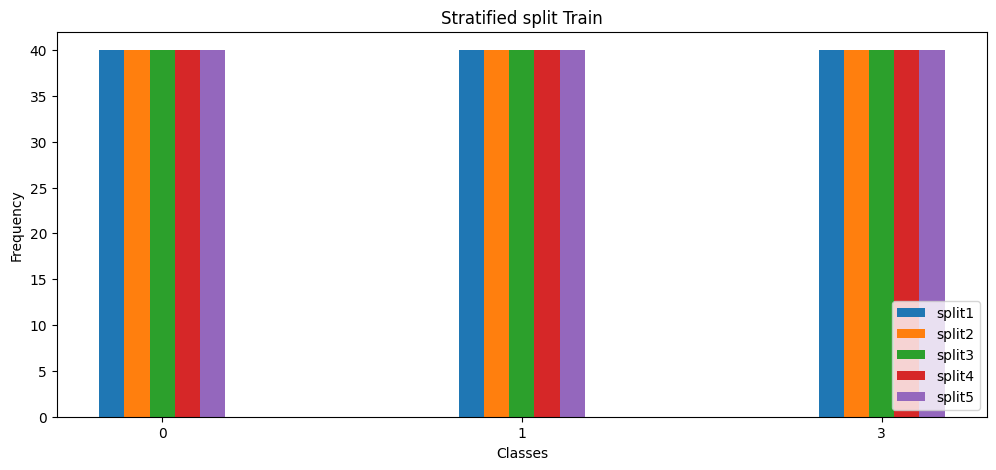

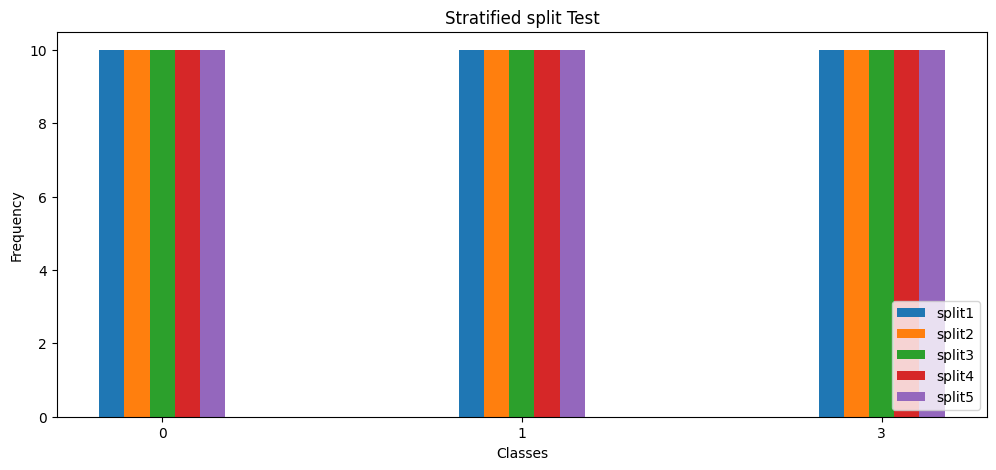

In [138]:
split_train = []
split_test = []
for train_index, test_index in stratified_split.split(data.data, data.target):    
    split_train.append([ v for _, v in sorted(Counter(list(data.target[train_index])).items())])
    split_test.append([ v for _, v in sorted(Counter(list(data.target[test_index])).items())])
    
plot_bars(split_train, [0,1,3], title='Stratified split Train')
plot_bars(split_test, [0,1,3], title='Stratified split Test')

### 3.3. Training and Testing the Model

#### 3.3.1. Classification Process

- Select the classification algorithm from [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
- Train on training data
- Predict labels on testing data
- Score prediction comparing predicted and reference labels

In [139]:
from sklearn.naive_bayes import GaussianNB

# choose classification algorithm & initialize it
clf = GaussianNB()

# for each training/testing fold
for train_index, test_index in stratified_split.split(data.data, data.target):
    # train (fit) model
    clf.fit(data.data[train_index], data.target[train_index])

    # predict test labels
    clf.predict(data.data[test_index])

    # score the model (using average accuracy for now)
    accuracy = clf.score(data.data[test_index], data.target[test_index])
    print("Accuracy: {:.3}".format(accuracy))

Accuracy: 0.933
Accuracy: 1.0
Accuracy: 0.9
Accuracy: 0.967
Accuracy: 0.933


#### 3.3.2. Baselines

Scikit-learn provides baselines via `DummyClassifier` class that takes `strategy` argument. The following baselines can be obtaing:

- random baseline: `uniform`
- chance baseline: `stratified`
- majority baseline: `most_frequent`


In [140]:
from sklearn.dummy import DummyClassifier

random_clf = DummyClassifier(strategy="uniform")

for train_index, test_index in stratified_split.split(data.data, data.target):
    random_clf.fit(data.data[train_index], data.target[train_index])
    random_clf.predict(data.data[test_index])
    accuracy = random_clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))


Accuracy: 0.367
Accuracy: 0.133
Accuracy: 0.367
Accuracy: 0.367
Accuracy: 0.467


#### Exercise

Try `stratified` and `most_frequent` strategies and observe performances

In [141]:
X = "most_frequent"

dummy_clf = DummyClassifier(strategy=X)
# Random and Stratified splits return the indexes of the data points (X or Y)  
# and not the data point itself
print('Strategy:\033[1m', 'most_frequent','\033[0m')
for train_index, test_index in stratified_split.split(data.data, data.target):
    dummy_clf.fit(data.data[train_index], data.target[train_index])
    dummy_clf.predict(data.data[test_index])
    accuracy = dummy_clf.score(data.data[test_index], data.target[test_index])
    
    print("Accuracy: {:.3}".format(accuracy))

Strategy: most_frequent 
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333
Accuracy: 0.333


In [142]:
X = "stratified"

dummy_clf = DummyClassifier(strategy= X)
# Random and Stratified splits return the indexes of the data points (X or Y)
# and not the data point itself
print('Strategy:\033[1m', 'stratified','\033[0m')
for train_index, test_index in stratified_split.split(data.data, data.target):
    dummy_clf.fit(data.data[train_index], data.target[train_index])
    dummy_clf.predict(data.data[test_index])
    accuracy = dummy_clf.score(data.data[test_index], data.target[test_index])

    print("Accuracy: {:.3}".format(accuracy))

Strategy: stratified 
Accuracy: 0.367
Accuracy: 0.167
Accuracy: 0.5
Accuracy: 0.2
Accuracy: 0.367


#### 3.3.3. Better Classification Report

scikit-learn provides functions to report more informative performance values using [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# choose classification algorithm & initialize it
clf = GaussianNB()

# for each training/testing fold
for train_index, test_index in stratified_split.split(data.data, data.target):
    # train (fit) model
    clf.fit(data.data[train_index], data.target[train_index])
    # predict test labels
    hyps = clf.predict(data.data[test_index])
    refs = data.target[test_index]
    
    report = classification_report(refs, hyps, target_names=data.target_names)
    
    print(report)
    

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy        

#### 3.3.4. Cross-Validation Evaluation

The cross-validation procedure and function of scikit-learn are described in [the documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# choose classification algorithm & initialize it
clf = GaussianNB()
# get scores
scores = cross_val_score(clf, data.data, data.target, cv=5)

print(scores)


[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


Cross-Validation using custom split and scoring.

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

# choose classification algorithm & initialize it
clf = GaussianNB()
# scoring providing our custom split & scoring using 
scores = cross_validate(clf, data.data, data.target, cv=stratified_split, scoring=['f1_macro'])

print(sum(scores['test_f1_macro'])/len(scores['test_f1_macro']))


0.9532497911445279


#### Exercise
- Read [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
- Try different evaluation scores
    - For instance, change f1_macro with f1_micro or f1_weighted

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate


clf = GaussianNB()

for scoring_metric in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(clf, data.data, data.target, cv=stratified_split, scoring=[scoring_metric])
    print('Scoring metric: \033[1m', scoring_metric, '\033[0m')
    print(sum(scores['test_'+scoring_metric])/len(scores['test_'+scoring_metric]))
    print('')

Scoring metric:  f1_macro 
0.9599665831244778

Scoring metric:  f1_micro 
0.9533333333333334

Scoring metric:  f1_weighted 
0.9530472646262119



### 3.4. Vectorizing Text

> The raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

Consequently, the additional step that **text classification** requires is vectorization that converts text into a vector of numerical values. `scikit-learn` provides several vectorization methods in `sklearn.feature_extraction` [module](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). Most commonly used ones are:

- Count Vectorization
- TF-IDF Vectorization

Problem:
    - We need to covert the string e.g. 'Hello World' into a matrix in which the rows are the vectors that represent the words. The the word-vector dimensionality, i.e. the number of columns, depends on the encoding method.
   
Result: 
```
      [
 Hello [0, 1],
 World [1, 0],
      ]
```

#### 3.4.1. Bag-of-Words Representation

[Count Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) implements the following vectorization procedure. 

- *tokenizing* strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- *counting* the occurrences of tokens in each document.

- *normalizing* and *weighting* with diminishing importance tokens that occur in the majority of samples / documents.

Each token is considered to be a __feature__ and the vector of all the token frequencies for a given document is considered a multivariate __sample__. Consequently, a corpus of documents is represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

> If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

The [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) implements both tokenization and occurrence counting in a single class, and it is possible to provide many parameters. 

It can take an external preprocessor or perform the following preprocessing steps (read documentation for details):

- __strip_accents__: remove accents and perform other character normalization during the preprocessing step.
- __lowercase__: convert all characters to lowercase before tokenizing.
- __stop_words__: apply a built-in stop word list for English is used. 
- __token_pattern__: regular expression denoting what constitutes a *token* for tokenization
- __ngram_range__: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. (We will see ngrams the next lab)
- __max_df__: maximum frequency cut-off: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). 
- __min_df__: minimum frequency cut-off: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
- __vocabulary__: externally provided vocabulary
- __binary__: If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

#### 3.4.2. [TF-IDF Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
TF-IDF Vectorization = Count Vectorization + TF-IDF Transformation

> Transforms a count matrix to a normalized tf or tf-idf representation

> __Tf__ means term-frequency while __tf-idf__ means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

(Please refer to the documentation for the transformation formulas).

#### 3.4.3. Vectorization Example

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'who plays luke on star wars new hope',
    'show credits for the godfather',
    'who was the main actor in the exorcist',
    'find the female actress from the movie she \'s the man',
    'who played dory on finding nemo'
]

vectorizer = CountVectorizer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(corpus)

print(vectors.toarray())  # print numpy vectors

# To print the labels of the columns
#print(vectorizer.get_feature_names())
# or
#print(vectorizer.get_feature_names_out())

[[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 1]
 [0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 3 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1]]


In [148]:
test_corpus = [
    'who was the female lead in resident evil',
    'who played guido in life is beautiful'
]

# 'trained' vectorizer can be later used to transform the test set 
test_vectors = vectorizer.transform(test_corpus)
print(test_vectors.toarray())

[[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


## Lab Exercise: Text Classification

- Using Newsgroup dataset from `scikit-learn` train and evaluate Linear SVM (LinearSVC) model
- Experiment with different vectorization methods and parameters, experiment_id in parentheses (e.g. CounVector, CutOff, etc.):
    - `binary` of Count Vectorization (CountVect)
    - TF-IDF Transformation (TF-IDF)
    - Using TF-IDF
        - min and max cut-offs (CutOff)
        - wihtout stop-words (WithoutStopWords)
        - without lowercasing (NoLowercase)
 
To print the results:
print(experiment_id, the most appropriate score metric to report))

**Note**:
If the SVM doesn't converge play with the $C$ hyperparameter (starting from a low value).


# Solution

# 1 Using Newsgroup dataset from `scikit-learn` train and evaluate Linear SVM (LinearSVC) model

In [149]:
from sklearn.datasets import fetch_20newsgroups  # 20 newsgroups dataset
from sklearn.svm import LinearSVC  # Linear SVM model (SVC)

## 1.1 Loading and Inspecting a Dataset

In [150]:
# Load the dataset
data = fetch_20newsgroups(subset='all', shuffle=True)

In [151]:
# Inspect the dataset
# no. of samples
print("Number of samples: ", len(data.data))

# no. of classes
print("Number of classes: ", len(data.target_names))

# class names
print("Class names: ", data.target_names)

Number of samples:  18846
Number of classes:  20
Class names:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [152]:
# sample per class distribution
print("Samples per class: {}".format(dict(Counter(list(data.target)))))

Samples per class: {10: 999, 3: 982, 17: 940, 4: 963, 12: 984, 19: 628, 11: 991, 13: 990, 0: 799, 8: 996, 7: 990, 5: 988, 1: 973, 14: 987, 16: 910, 6: 975, 9: 994, 18: 775, 2: 985, 15: 997}


In [153]:
# print the first sample features
print("First sample features: {}".format(data.data[0]))

First sample features: From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [154]:
# print the labels
print("Labels: {}".format(data.target))

Labels: [10  3 17 ...  3  1  7]


In [155]:
# print the first sample label
print("First sample label: {}".format(data.target[0]))

First sample label: 10


In [156]:
# print the first sample class name
print("First sample class name: {}".format(data.target_names[data.target[0]]))

First sample class name: rec.sport.hockey


## 1.2 Splitting the Dataset

In [157]:
# Split the dataset using k-fold cross-validation (k=5) and stratified CV
from sklearn.model_selection import StratifiedKFold

# 5-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# split the dataset
stratified_split = stratified_kfold.split(data.data, data.target)

split_train = []
split_test = []

# get the splits
for train_index, test_index in stratified_kfold.split(data.data, data.target):
    split_train.append(train_index)
    split_test.append(test_index)

print("Number of splits: ", len(split_train))
print("Number of Train samples in the first split: ", len(split_train[0]))
print("Number of Test samples in the first split: ", len(split_test[0]))

Number of splits:  5
Number of Train samples in the first split:  15076
Number of Test samples in the first split:  3770


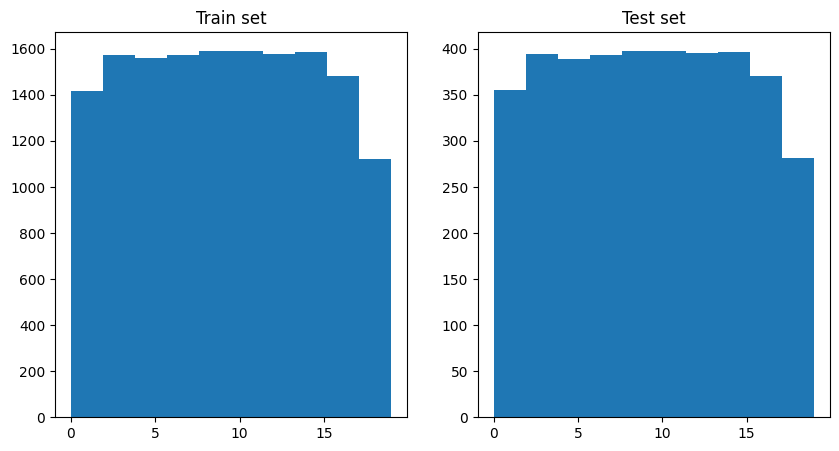

In [158]:
# distribution of the train and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data.target[split_train[0]])
plt.title("Train set")

plt.subplot(1, 2, 2)
plt.hist(data.target[split_test[0]])
plt.title("Test set")

plt.show()

## 1.3 Vectorization

In [159]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization
vectorizer = CountVectorizer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 1.4 Training and Evaluation

In [160]:
from sklearn.metrics import classification_report

# Linear SVM model
model = LinearSVC()

# train and evaluate the model
for i in range(len(split_train)):
    # train the model
    model.fit(vectors[split_train[i]], data.target[split_train[i]])

    # evaluate the model
    y_pred = model.predict(vectors[split_test[i]])

    # print the classification report
    print('\033[1m', 'Split : ', i, '\033[0m')
    print(classification_report(data.target[split_test[i]], y_pred))
    print()

C:\Users\adnan\anaconda3\envs\NLU-LABs-venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Split :  0 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       160
           1       0.81      0.74      0.77       195
           2       0.85      0.84      0.84       197
           3       0.80      0.78      0.79       197
           4       0.82      0.85      0.83       192
           5       0.88      0.87      0.87       197
           6       0.86      0.86      0.86       195
           7       0.88      0.92      0.90       198
           8       0.95      0.97      0.96       199
           9       0.95      0.94      0.95       199
          10       0.98      0.98      0.98       200
          11       0.94      0.93      0.93       198
          12       0.83      0.85      0.84       197
          13       0.91      0.95      0.93       198
          14       0.92      0.92      0.92       197
          15       0.89      0.96      0.93       200
          16       0.93      0.92      0.93       182
          17  

C:\Users\adnan\anaconda3\envs\NLU-LABs-venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Split :  1 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       159
           1       0.83      0.87      0.85       195
           2       0.84      0.83      0.84       197
           3       0.82      0.81      0.81       196
           4       0.87      0.88      0.87       193
           5       0.88      0.85      0.87       197
           6       0.87      0.87      0.87       195
           7       0.91      0.93      0.92       198
           8       0.95      0.96      0.96       200
           9       0.91      0.97      0.94       199
          10       0.96      0.96      0.96       200
          11       0.98      0.94      0.96       199
          12       0.83      0.87      0.85       197
          13       0.90      0.91      0.91       198
          14       0.94      0.92      0.93       197
          15       0.91      0.91      0.91       199
          16       0.92      0.91      0.91       182
          17  

C:\Users\adnan\anaconda3\envs\NLU-LABs-venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Split :  2 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       160
           1       0.83      0.78      0.81       195
           2       0.87      0.84      0.86       197
           3       0.78      0.79      0.78       196
           4       0.86      0.82      0.84       193
           5       0.89      0.85      0.87       198
           6       0.86      0.86      0.86       195
           7       0.91      0.94      0.93       198
           8       0.92      0.96      0.94       199
           9       0.96      0.94      0.95       199
          10       0.97      0.97      0.97       200
          11       0.93      0.96      0.95       198
          12       0.80      0.85      0.82       197
          13       0.90      0.95      0.92       198
          14       0.94      0.96      0.95       197
          15       0.94      0.92      0.93       199
          16       0.90      0.93      0.91       182
          17  

C:\Users\adnan\anaconda3\envs\NLU-LABs-venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Split :  3 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.76      0.81      0.78       194
           2       0.84      0.79      0.81       197
           3       0.76      0.78      0.77       196
           4       0.90      0.85      0.87       193
           5       0.85      0.86      0.86       198
           6       0.82      0.84      0.83       195
           7       0.90      0.91      0.90       198
           8       0.95      0.91      0.93       199
           9       0.93      0.95      0.94       199
          10       0.98      0.98      0.98       200
          11       0.96      0.92      0.94       198
          12       0.82      0.82      0.82       196
          13       0.91      0.91      0.91       198
          14       0.95      0.95      0.95       198
          15       0.91      0.93      0.92       199
          16       0.92      0.94      0.93       182
          17  

C:\Users\adnan\anaconda3\envs\NLU-LABs-venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [161]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# train and evaluate the model
for i in range(len(split_train)):
    # train the model
    model.fit(vectors[split_train[i]], data.target[split_train[i]])

    # evaluate the model
    y_pred = model.predict(vectors[split_test[i]])

    # print the classification report
    print('\033[1m', 'Split : ', i, '\033[0m')
    print(classification_report(data.target[split_test[i]], y_pred))
    print()

 Split :  0 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       160
           1       0.74      0.66      0.70       195
           2       0.74      0.80      0.77       197
           3       0.74      0.64      0.69       197
           4       0.82      0.73      0.77       192
           5       0.79      0.85      0.82       197
           6       0.54      0.89      0.67       195
           7       0.89      0.84      0.87       198
           8       0.89      0.93      0.91       199
           9       0.89      0.85      0.87       199
          10       0.87      0.94      0.90       200
          11       0.91      0.91      0.91       198
          12       0.86      0.69      0.76       197
          13       0.85      0.87      0.86       198
          14       0.87      0.92      0.89       197
          15       0.84      0.94      0.89       200
          16       0.86      0.88      0.87       182
          17  

## 1.5 Cross-Validation Evaluation

In [162]:
from sklearn.model_selection import cross_validate

# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.81
 F1_MICRO  : 0.81
 F1_WEIGHTED  : 0.81


# 2 Experiment with different vectorization methods and parameters, experiment_id in parentheses (e.g. CounVector, CutOff, etc.):

## 2.1 binary of Count Vectorization (CountVect)

In [163]:
# Count Vectorization
vectorizer = CountVectorizer(binary=True)

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [164]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.78
 F1_MICRO  : 0.8
 F1_WEIGHTED  : 0.79


## 2.2 TF-IDF Transformation (TF-IDF)

In [177]:
# TF-IDF Transformation (TF-IDF)
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF Transformation
transformer = TfidfTransformer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = transformer.fit_transform(vectors)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [178]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.5
 F1_MICRO  : 0.55
 F1_WEIGHTED  : 0.52


## 2.3 TF-IDF Vectorization (TFIDF)

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [180]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.53
 F1_MICRO  : 0.57
 F1_WEIGHTED  : 0.55


## 2.4 min and max cut-offs (CutOff)

### 2.4.1 min and max cut-offs (CutOff) with Count Vectorization (CountVect)

In [181]:
# Count Vectorization
vectorizer = CountVectorizer(min_df=0.01, max_df=0.99)

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

In [182]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.71
 F1_MICRO  : 0.72
 F1_WEIGHTED  : 0.71


### 2.4.2 min and max cut-offs (CutOff) with TF-IDF Transformation (TF-IDF)

In [183]:
# TF-IDF Transformation with min and max cut-offs
transformer = TfidfTransformer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = transformer.fit_transform(vectors)

In [184]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))


 F1_MACRO  : 0.5
 F1_MICRO  : 0.55
 F1_WEIGHTED  : 0.52


### 2.4.3 min and max cut-offs (CutOff) with TF-IDF Vectorization (TFIDF)

In [185]:
# TF-IDF Vectorization with min and max cut-offs
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.99)

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [186]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.5
 F1_MICRO  : 0.55
 F1_WEIGHTED  : 0.52


## 2.5 wihtout stop-words (WithoutStopWords)

### 2.5.1 wihtout stop-words (WithoutStopWords) with Count Vectorization (CountVect)

In [187]:
# Count Vectorization without stop-words
vectorizer = CountVectorizer(stop_words='english')

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [188]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.83
 F1_MICRO  : 0.83
 F1_WEIGHTED  : 0.83


### 2.5.2 wihtout stop-words (WithoutStopWords) with TF-IDF Transformation (TF-IDF)

In [189]:
# TF-IDF Transformation without stop-words
transformer = TfidfTransformer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = transformer.fit_transform(vectors)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [190]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.6
 F1_MICRO  : 0.67
 F1_WEIGHTED  : 0.62


### 2.5.3 wihtout stop-words (WithoutStopWords) with TF-IDF Vectorization (TFIDF)

In [191]:
# TF-IDF Vectorization without stop-words
vectorizer = TfidfVectorizer(stop_words='english')

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [192]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.6
 F1_MICRO  : 0.67
 F1_WEIGHTED  : 0.62


## 2.6 without lowercasing (NoLowercase)

### 2.6.1 without lowercasing (NoLowercase) with Count Vectorization (CountVect)

In [193]:
# Count Vectorization without lowercasing
vectorizer = CountVectorizer(lowercase=False)

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [194]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.79
 F1_MICRO  : 0.79
 F1_WEIGHTED  : 0.8


### 2.6.2 without lowercasing (NoLowercase) with TF-IDF Transformation (TF-IDF)

In [195]:
# TF-IDF Transformation without lowercasing
transformer = TfidfTransformer()

# use fit_transform to 'learn' the features and vectorize the data
vectors = transformer.fit_transform(vectors)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [196]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.5
 F1_MICRO  : 0.55
 F1_WEIGHTED  : 0.53


### 2.6.3 without lowercasing (NoLowercase) with TF-IDF Vectorization (TFIDF)

In [197]:
# TF-IDF Vectorization without lowercasing
vectorizer = TfidfVectorizer(lowercase=False)

# use fit_transform to 'learn' the features and vectorize the data
vectors = vectorizer.fit_transform(data.data)

print(vectors.toarray())  # print numpy vectors

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [198]:
# Linear SVM model
model = LinearSVC(C=0.0001)

# cross-validation evaluation
for metric_score in ['f1_macro', 'f1_micro', 'f1_weighted']:
    scores = cross_validate(model, vectors, data.target, cv=stratified_kfold, scoring=[metric_score])
    print('\033[1m', metric_score.upper(),'\033[0m', ':',
          round(sum(scores['test_' + metric_score])/len(scores['test_' + metric_score]), 2))

 F1_MACRO  : 0.5
 F1_MICRO  : 0.55
 F1_WEIGHTED  : 0.53


## To do

Need to watch following videos before exam:
- [Bag of Words](https://www.youtube.com/watch?v=Yt1Sw6yWjlw)
- [TF-IDF Transformation with Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)
- [TF-IDF](https://www.youtube.com/watch?v=D2V1okCEsiE&t=13s)
- [Count Vectorization](https://www.youtube.com/watch?v=RZYjsw6P4nI&t=26s)
- [Count Vectorizer Vs TF-IDF](https://www.youtube.com/watch?v=WN18JksF9Cg)